# Detectron2: Zebrafish

<table align="left">
<tbody><tr><td>
   <a target="_blank" href="https://colab.research.google.com/github/j0rd1smit/CS4245_cv_project_zebra_fish/blob/master/notebooks/colab/Detectron2_zebra_fish_segmatation-colab.ipynb">
     <img src="https://camo.githubusercontent.com/dfbf50eed8dd2dea5f3e0beaaf2001eeca77f314/68747470733a2f2f7777772e74656e736f72666c6f772e6f72672f696d616765732f636f6c61625f6c6f676f5f333270782e706e67" data-canonical-src="https://www.tensorflow.org/images/colab_logo_32px.png">Run in Google Colab
   </a>
 </td>
<td>
   <a target="_blank" href="https://github.com/j0rd1smit/CS4245_cv_project_zebra_fish/blob/master/notebooks/colab/Detectron2_zebra_fish_segmatation-colab.ipynb">
     <img width="32px" src="https://camo.githubusercontent.com/9a6bfd119aeed95f13553a994f2d1cd97e033768/68747470733a2f2f7777772e74656e736f72666c6f772e6f72672f696d616765732f4769744875622d4d61726b2d333270782e706e67" data-canonical-src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">View source on GitHub</a>
 </td>
</tr></tbody></table>

## Install detectron2

In [ ]:
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!gcc --version

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Requirement already up-to-date: torch==1.4+cu100 in /home/jordi/miniconda3/envs/detectron2/lib/python3.7/site-packages (1.4.0+cu100)
Requirement already up-to-date: torchvision==0.5+cu100 in /home/jordi/miniconda3/envs/detectron2/lib/python3.7/site-packages (0.5.0+cu100)
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-i8i1mcfs
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-i8i1mcfs

In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html

In [ ]:
!git clone https://github.com/j0rd1smit/CS4245_cv_project_zebra_fish.git
!cd CS4245_cv_project_zebra_fish

In [ ]:
import os
os.chdir("CS4245_cv_project_zebra_fish")

## Train on a custom dataset

In [1]:
#General
import os
import numpy as np

# custom code
from zebrafish.configs import get_default_instance_segmentation_config, load_config
from zebrafish.dataset import register_datasets, load_all_image_in_dataset
from zebrafish.evaluation import coco_evaluation, coco_evaluation_all_model
from zebrafish.model import predict
from zebrafish.trainers import TrainingUtil
from zebrafish.visualization import plot_prediction, plot_train_vs_validation_loss, plot_segementation, plot_segementation_vs_real
from zebrafish.utils import is_in_main_dir

#detectron
from detectron2.utils.logger import setup_logger


setup_logger()

if "notebooks" in os.getcwd() and "colab" in os.getcwd():
    os.chdir("..")
    os.chdir("..")

assert is_in_main_dir(), "The notebook expectes you to be in the main directory"

register_datasets("dataset")

In [2]:
max_iter = 2000
use_direction_classes = True

# Create a new model everytime you run this cell
cfg = get_default_instance_segmentation_config(
    use_direction_classes,
    max_iter=max_iter,
)

# Loads an old model
# cfg = load_config(path_to_model) # load cfg from disk
# use_direction_classes = cfg.DATASETS.USE_DIRECTION_CLASSES # load use_direction_classes from disk

In [3]:
cfg.SOLVER.MAX_ITER = max_iter # Increase the number of iters here if needed.

In [4]:
resume = True # Set to true if want to continue training where use left off.
TrainingUtil.train(cfg, resume=resume)

[05/29 10:16:26 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[05/29 10:16:27 d2.data.build]: Removed 0 images with no usable annotations. 5 images left.
[05/29 10:16:27 d2.data.build]: Distribution of instances among all 8 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|     N      | 8            |     NE     | 10           |     E      | 11           |
|     SE     | 4            |     S      | 5            |     SW     | 10           |
|     W      | 16           |     NW     | 5            |            |              |
|   total    | 69           |            |              |            |              |
[05/29 10:16:27 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[05/29 10:16:27 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/29 10:16:27 d2.data.detection_utils]: TransformGens used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 80

[05/29 10:18:08 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.059129 s / img per device, on 1 devices)
[05/29 10:18:08 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/29 10:18:08 d2.evaluation.coco_evaluation]: Saving results to /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_29_10_16_23/inference/coco_instances_results.json
[05/29 10:18:08 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.040
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.066
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.043
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100

[05/29 10:18:41 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP    | category   | AP    |
|:-----------|:-------|:-----------|:------|:-----------|:------|
| N          | 20.099 | NE         | 6.535 | E          | 0.000 |
| SE         | 0.000  | S          | 0.000 | SW         | 8.713 |
| W          | 30.176 | NW         | 0.000 |            |       |
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.071
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.132
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.054
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=

[05/29 10:19:14 d2.engine.defaults]: Evaluation results for val_direction in csv format:
[05/29 10:19:14 d2.evaluation.testing]: copypaste: Task: bbox
[05/29 10:19:14 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/29 10:19:14 d2.evaluation.testing]: copypaste: 19.0124,28.8941,22.3842,nan,44.7525,16.7824
[05/29 10:19:14 d2.evaluation.testing]: copypaste: Task: segm
[05/29 10:19:14 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/29 10:19:14 d2.evaluation.testing]: copypaste: 17.8089,27.0872,21.9015,nan,44.5710,15.6744
[05/29 10:19:14 d2.utils.events]:  eta: 0:15:05  iter: 299  total_loss: 1.022  loss_cls: 0.375  loss_box_reg: 0.414  loss_mask: 0.181  loss_rpn_cls: 0.001  loss_rpn_loc: 0.049  validation_loss: 1.327  time: 0.5381  data_time: 0.0780  lr: 0.000997  max_mem: 5044M
[05/29 10:19:25 d2.utils.events]:  eta: 0:14:57  iter: 319  total_loss: 1.006  loss_cls: 0.315  loss_box_reg: 0.385  loss_mask: 0.209  loss_rpn_cls: 0.002  loss_rpn_loc: 0.047  valid

[05/29 10:20:22 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/29 10:20:22 d2.evaluation.coco_evaluation]: Saving results to /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_29_10_16_23/inference/coco_instances_results.json
[05/29 10:20:22 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.451
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.687
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.524
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.622
 Average Precision  (AP) @[ IoU=0.50:

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.427
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.708
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.541
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.709
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.414
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.454
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.454
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

[05/29 10:21:30 d2.evaluation.testing]: copypaste: Task: bbox
[05/29 10:21:30 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/29 10:21:30 d2.evaluation.testing]: copypaste: 49.3214,76.3614,60.6200,nan,67.9703,47.3511
[05/29 10:21:30 d2.evaluation.testing]: copypaste: Task: segm
[05/29 10:21:30 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/29 10:21:30 d2.evaluation.testing]: copypaste: 43.1443,69.1007,53.2775,nan,70.7850,40.7510
[05/29 10:21:31 d2.utils.events]:  eta: 0:13:02  iter: 539  total_loss: 0.697  loss_cls: 0.165  loss_box_reg: 0.320  loss_mask: 0.162  loss_rpn_cls: 0.002  loss_rpn_loc: 0.034  validation_loss: 0.963  time: 0.5405  data_time: 0.0728  lr: 0.001000  max_mem: 5044M
[05/29 10:21:42 d2.utils.events]:  eta: 0:12:52  iter: 559  total_loss: 0.734  loss_cls: 0.151  loss_box_reg: 0.307  loss_mask: 0.172  loss_rpn_cls: 0.002  loss_rpn_loc: 0.037  validation_loss: 0.963  time: 0.5411  data_time: 0.0738  lr: 0.001000  max_mem: 5044M
[05/29 1

[05/29 10:22:40 d2.evaluation.coco_evaluation]: Saving results to /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_29_10_16_23/inference/coco_instances_results.json
[05/29 10:22:40 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.592
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.879
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.603
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.707
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.589
 Average Recall     (AR) @[ IoU=0.50:0.95 |

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.532
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.828
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.622
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.751
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.505
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.279
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.556
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.556
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

[05/29 10:23:50 d2.evaluation.testing]: copypaste: Task: bbox
[05/29 10:23:50 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/29 10:23:50 d2.evaluation.testing]: copypaste: 66.6407,90.7178,83.1745,nan,73.7871,65.8014
[05/29 10:23:50 d2.evaluation.testing]: copypaste: Task: segm
[05/29 10:23:50 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/29 10:23:50 d2.evaluation.testing]: copypaste: 56.9421,90.7178,66.8814,nan,76.8812,55.2726
[05/29 10:23:50 d2.utils.events]:  eta: 0:11:00  iter: 779  total_loss: 0.674  loss_cls: 0.211  loss_box_reg: 0.286  loss_mask: 0.153  loss_rpn_cls: 0.002  loss_rpn_loc: 0.030  validation_loss: 0.876  time: 0.5455  data_time: 0.0885  lr: 0.001000  max_mem: 5044M
[05/29 10:24:01 d2.utils.events]:  eta: 0:10:49  iter: 799  total_loss: 0.649  loss_cls: 0.188  loss_box_reg: 0.266  loss_mask: 0.151  loss_rpn_cls: 0.001  loss_rpn_loc: 0.030  validation_loss: 0.876  time: 0.5451  data_time: 0.0753  lr: 0.001000  max_mem: 5044M
[05/29 1

[05/29 10:24:59 d2.evaluation.coco_evaluation]: Saving results to /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_29_10_16_23/inference/coco_instances_results.json
[05/29 10:24:59 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.696
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.928
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.883
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.821
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.681
 Average Recall     (AR) @[ IoU=0.50:0.95 |

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.649
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.988
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.823
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.795
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.640
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.327
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.673
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.673
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

[05/29 10:26:07 d2.evaluation.testing]: copypaste: Task: bbox
[05/29 10:26:07 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/29 10:26:07 d2.evaluation.testing]: copypaste: 70.8275,98.6386,92.9208,nan,75.6040,69.9449
[05/29 10:26:07 d2.evaluation.testing]: copypaste: Task: segm
[05/29 10:26:07 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/29 10:26:07 d2.evaluation.testing]: copypaste: 64.6507,96.1634,79.6473,nan,79.0635,63.8525
[05/29 10:26:08 d2.utils.events]:  eta: 0:08:49  iter: 1019  total_loss: 0.586  loss_cls: 0.140  loss_box_reg: 0.276  loss_mask: 0.141  loss_rpn_cls: 0.001  loss_rpn_loc: 0.028  validation_loss: 0.841  time: 0.5453  data_time: 0.0794  lr: 0.001000  max_mem: 5044M
[05/29 10:26:18 d2.utils.events]:  eta: 0:08:38  iter: 1039  total_loss: 0.561  loss_cls: 0.157  loss_box_reg: 0.251  loss_mask: 0.140  loss_rpn_cls: 0.001  loss_rpn_loc: 0.029  validation_loss: 0.841  time: 0.5452  data_time: 0.0826  lr: 0.001000  max_mem: 5044M
[05/29

[05/29 10:27:16 d2.evaluation.coco_evaluation]: Saving results to /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_29_10_16_23/inference/coco_instances_results.json
[05/29 10:27:16 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.728
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.959
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.935
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.780
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.716
 Average Recall     (AR) @[ IoU=0.50:0.95 |

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.662
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.967
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.859
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.793
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.654
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.333
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.689
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.689
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

[05/29 10:28:23 d2.evaluation.testing]: copypaste: Task: bbox
[05/29 10:28:23 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/29 10:28:23 d2.evaluation.testing]: copypaste: 78.1428,97.5248,92.7444,nan,84.7277,77.1528
[05/29 10:28:23 d2.evaluation.testing]: copypaste: Task: segm
[05/29 10:28:23 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/29 10:28:23 d2.evaluation.testing]: copypaste: 70.8116,97.5248,90.2228,nan,79.9299,70.4460
[05/29 10:28:24 d2.utils.events]:  eta: 0:06:40  iter: 1259  total_loss: 0.486  loss_cls: 0.109  loss_box_reg: 0.233  loss_mask: 0.119  loss_rpn_cls: 0.001  loss_rpn_loc: 0.026  validation_loss: 0.723  time: 0.5447  data_time: 0.0849  lr: 0.001000  max_mem: 5044M
[05/29 10:28:35 d2.utils.events]:  eta: 0:06:30  iter: 1279  total_loss: 0.524  loss_cls: 0.137  loss_box_reg: 0.230  loss_mask: 0.134  loss_rpn_cls: 0.001  loss_rpn_loc: 0.024  validation_loss: 0.723  time: 0.5445  data_time: 0.0915  lr: 0.001000  max_mem: 5044M
[05/29

[05/29 10:29:32 d2.evaluation.coco_evaluation]: Saving results to /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_29_10_16_23/inference/coco_instances_results.json
[05/29 10:29:32 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.739
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.988
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.959
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.828
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.729
 Average Recall     (AR) @[ IoU=0.50:0.95 |

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.703
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.988
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.877
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.838
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.698
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.357
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.738
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.738
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

[05/29 10:30:41 d2.evaluation.testing]: copypaste: Task: bbox
[05/29 10:30:41 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/29 10:30:41 d2.evaluation.testing]: copypaste: 73.8476,100.0000,95.2970,nan,83.2178,73.5719
[05/29 10:30:41 d2.evaluation.testing]: copypaste: Task: segm
[05/29 10:30:41 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/29 10:30:41 d2.evaluation.testing]: copypaste: 66.1230,95.6683,84.1034,nan,79.6287,65.2464
[05/29 10:30:42 d2.utils.events]:  eta: 0:04:31  iter: 1499  total_loss: 0.526  loss_cls: 0.118  loss_box_reg: 0.250  loss_mask: 0.126  loss_rpn_cls: 0.001  loss_rpn_loc: 0.023  validation_loss: 0.631  time: 0.5450  data_time: 0.0835  lr: 0.001000  max_mem: 5044M
[05/29 10:30:52 d2.utils.events]:  eta: 0:04:20  iter: 1519  total_loss: 0.457  loss_cls: 0.073  loss_box_reg: 0.207  loss_mask: 0.120  loss_rpn_cls: 0.001  loss_rpn_loc: 0.024  validation_loss: 0.631  time: 0.5448  data_time: 0.0854  lr: 0.001000  max_mem: 5044M
[05/2

[05/29 10:31:49 d2.evaluation.coco_evaluation]: Saving results to /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_29_10_16_23/inference/coco_instances_results.json
[05/29 10:31:49 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.05s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.738
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.979
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.923
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.713
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.738
 Average Recall     (AR) @[ IoU=0.50:0.95 |

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.705
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.957
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.866
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.837
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.698
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.360
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.730
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.730
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

[05/29 10:32:56 d2.evaluation.testing]: copypaste: Task: bbox
[05/29 10:32:56 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/29 10:32:56 d2.evaluation.testing]: copypaste: 75.5146,97.5248,95.4208,nan,83.1436,73.9130
[05/29 10:32:56 d2.evaluation.testing]: copypaste: Task: segm
[05/29 10:32:56 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/29 10:32:56 d2.evaluation.testing]: copypaste: 67.5305,93.7655,83.5303,nan,81.2822,67.1946
[05/29 10:32:57 d2.utils.events]:  eta: 0:02:20  iter: 1739  total_loss: 0.562  loss_cls: 0.170  loss_box_reg: 0.254  loss_mask: 0.138  loss_rpn_cls: 0.001  loss_rpn_loc: 0.020  validation_loss: 0.564  time: 0.5438  data_time: 0.0675  lr: 0.001000  max_mem: 5044M
[05/29 10:33:07 d2.utils.events]:  eta: 0:02:09  iter: 1759  total_loss: 0.483  loss_cls: 0.092  loss_box_reg: 0.212  loss_mask: 0.117  loss_rpn_cls: 0.001  loss_rpn_loc: 0.021  validation_loss: 0.564  time: 0.5437  data_time: 0.0808  lr: 0.001000  max_mem: 5044M
[05/29

[05/29 10:34:04 d2.evaluation.coco_evaluation]: Saving results to /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_29_10_16_23/inference/coco_instances_results.json
[05/29 10:34:04 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.804
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.988
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.988
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.863
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.797
 Average Recall     (AR) @[ IoU=0.50:0.95 |

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.730
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.964
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.921
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.787
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.728
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.374
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.762
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.762
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

[05/29 10:35:12 d2.evaluation.testing]: copypaste: Task: bbox
[05/29 10:35:12 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/29 10:35:12 d2.evaluation.testing]: copypaste: 78.0204,98.7624,98.7624,nan,89.3564,77.4499
[05/29 10:35:12 d2.evaluation.testing]: copypaste: Task: segm
[05/29 10:35:12 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/29 10:35:12 d2.evaluation.testing]: copypaste: 69.6890,98.7624,80.7020,nan,83.7471,69.6699
[05/29 10:35:12 d2.utils.events]:  eta: 0:00:11  iter: 1979  total_loss: 0.436  loss_cls: 0.058  loss_box_reg: 0.204  loss_mask: 0.105  loss_rpn_cls: 0.001  loss_rpn_loc: 0.021  validation_loss: 0.510  time: 0.5432  data_time: 0.0741  lr: 0.001000  max_mem: 5044M
[05/29 10:35:24 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[05/29 10:35:24 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/29 10:35:24 d2.evaluation.evaluator]: Start inference on 5 images
[05/29 10:35:24 d2.evaluation.

## Learning curve

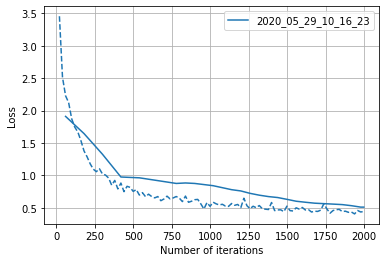

In [5]:
plot_train_vs_validation_loss([cfg.OUTPUT_DIR], show_training_loss=True)

## Evaluation

In [6]:
coco_evaluation(cfg, dataset_name="test")


WARNING [05/29 10:35:26 d2.evaluation.coco_evaluation]: json_file was not found in MetaDataCatalog for 'test_direction'. Trying to convert it to COCO format ...
[05/29 10:35:26 d2.data.datasets.coco]: Converting dataset annotations in 'test_direction' to COCO format ...)
[05/29 10:35:26 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[05/29 10:35:26 d2.data.datasets.coco]: Conversion finished, num images: 5, num annotations: 69
[05/29 10:35:26 d2.data.datasets.coco]: Caching annotations in COCO format: /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_29_10_16_23/test_direction_coco_format.json
[05/29 10:35:27 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/29 10:35:27 d2.evaluation.coco_evaluation]: Saving results to /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_29_10_16_23/coco_instances_results.json
[05/29 10:35:27 d2.evaluation.coco_evaluation]: Evaluating predictions ...
WARNING [05/29 10

OrderedDict([('bbox',
              {'AP': nan,
               'AP50': nan,
               'AP75': nan,
               'APs': nan,
               'APm': nan,
               'APl': nan}),
             ('segm',
              {'AP': nan,
               'AP50': nan,
               'AP75': nan,
               'APs': nan,
               'APm': nan,
               'APl': nan})])

## Evaluation against other models

In [7]:
bbox_df, segm_df = coco_evaluation_all_model("test")

WARNING [05/29 10:35:27 d2.evaluation.coco_evaluation]: json_file was not found in MetaDataCatalog for 'test_without_direction'. Trying to convert it to COCO format ...
[05/29 10:35:27 d2.data.datasets.coco]: Cached annotations in COCO format already exist: /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_29_08_49_05/test_without_direction_coco_format.json
[05/29 10:35:28 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/29 10:35:28 d2.evaluation.coco_evaluation]: Saving results to /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_29_08_49_05/coco_instances_results.json
[05/29 10:35:28 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets

[05/29 10:35:31 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.797
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.988
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.988
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.898
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.786
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.412
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.821
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] 

In [8]:
bbox_df

,model,AP,AP50,AP75,APs,APm,APl
0,output/2020_05_29_08_49_05,83.631830,97.029703,97.029703,NaN,92.079208,82.040561
1,output/2020_05_24_21_44_41,76.826626,97.524752,93.301361,NaN,90.816832,75.273436
2,output/2020_05_29_10_16_23,79.705922,98.762376,98.762376,NaN,89.839109,78.551948


In [9]:
segm_df

,model,AP,AP50,AP75,APs,APm,APl
0,output/2020_05_29_08_49_05,75.643234,97.029703,93.399340,NaN,83.642150,73.754289
1,output/2020_05_24_21_44_41,68.556789,95.080446,82.287541,NaN,79.937058,68.015058
2,output/2020_05_29_10_16_23,70.810536,98.762376,83.913641,NaN,81.019566,70.336344


## Tensorboard

In [10]:
%load_ext tensorboard
%tensorboard --logdir output

Reusing TensorBoard on port 6006 (pid 5899), started 1:27:49 ago. (Use '!kill 5899' to kill it.)

## Visualization
Here we display the prediction for the unseen test set.

In [11]:
threshold = 0.75
n_images = 10
dataset = "test"

images = load_all_image_in_dataset(dataset, cfg)[:n_images]
predictions = predict(cfg, images, threshold=threshold)

### Prediction

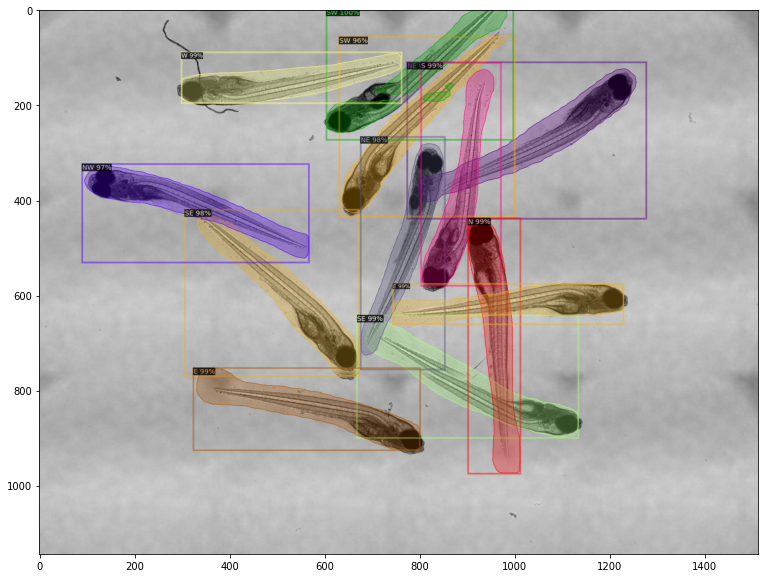

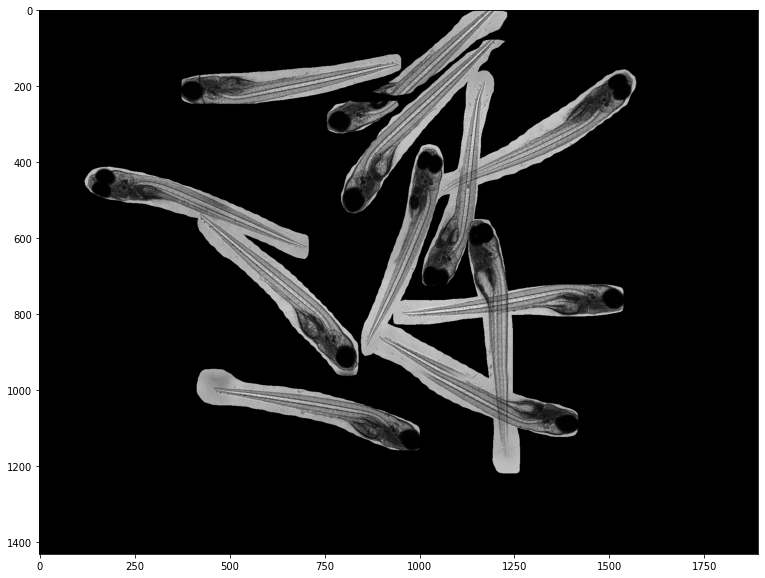

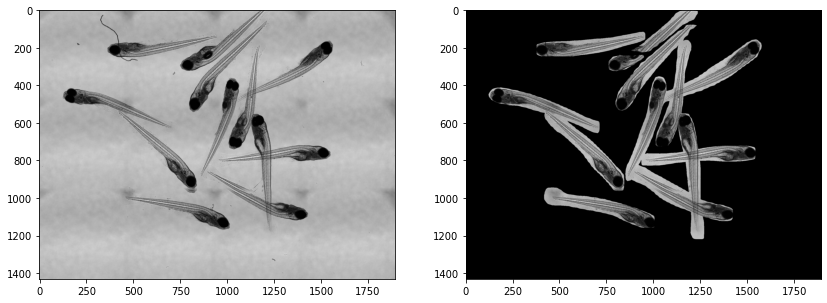

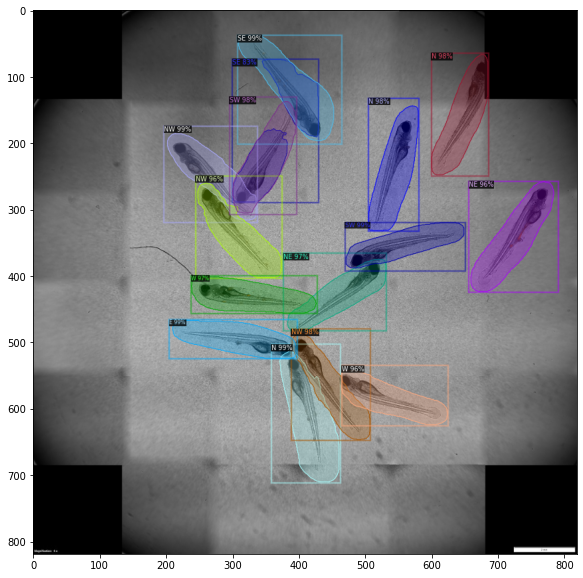

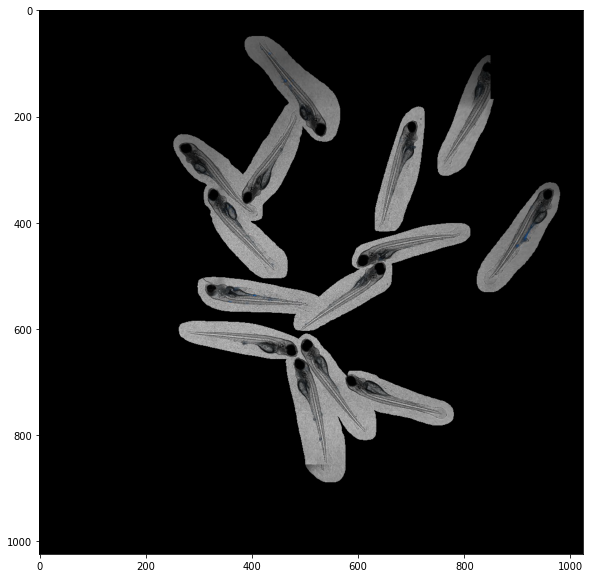

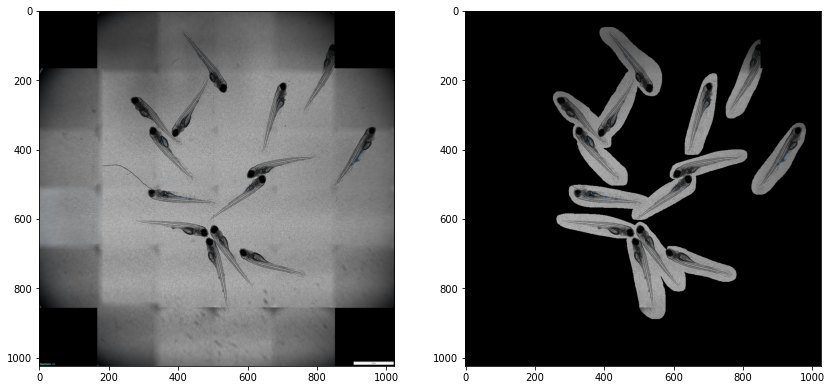

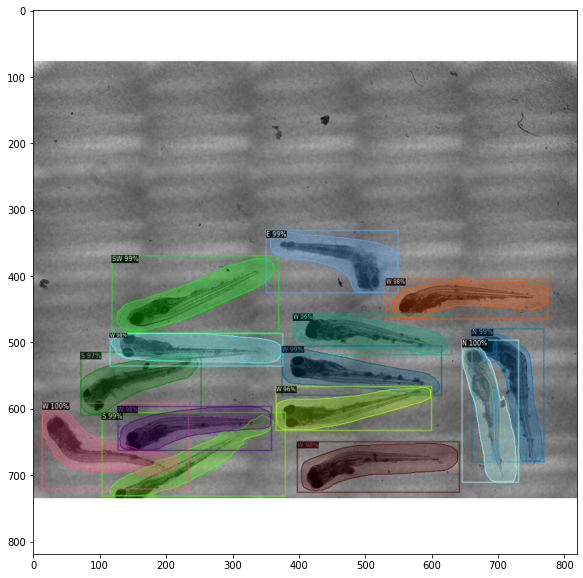

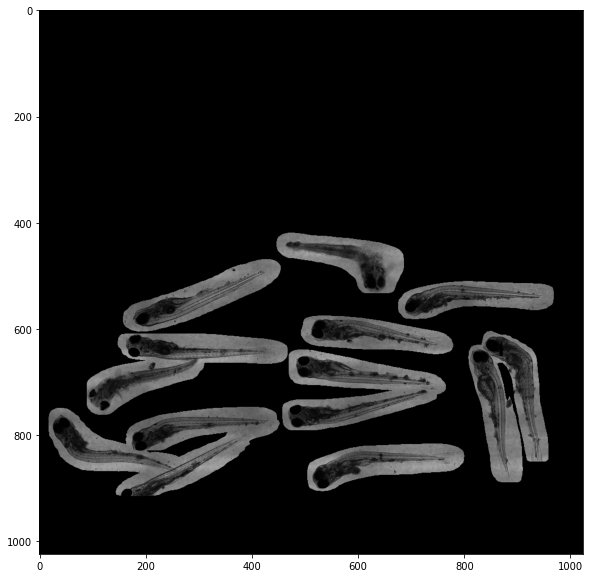

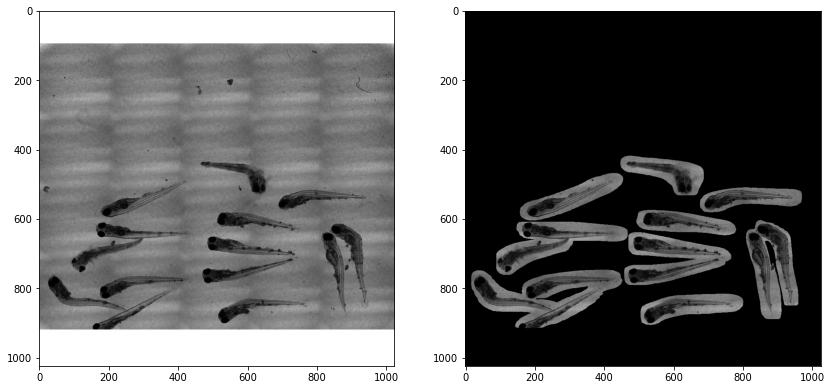

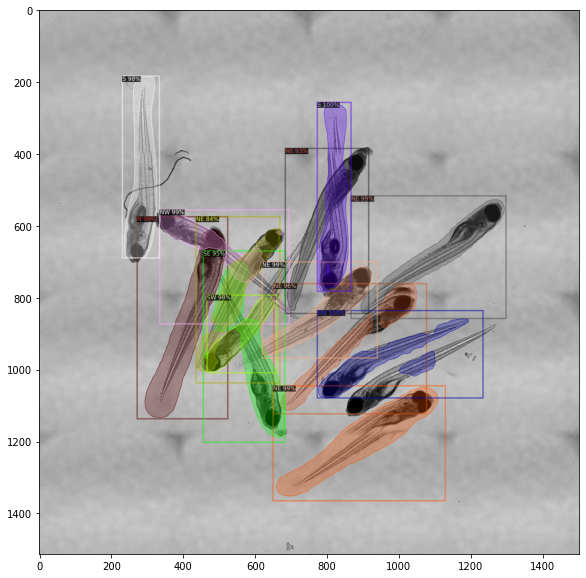

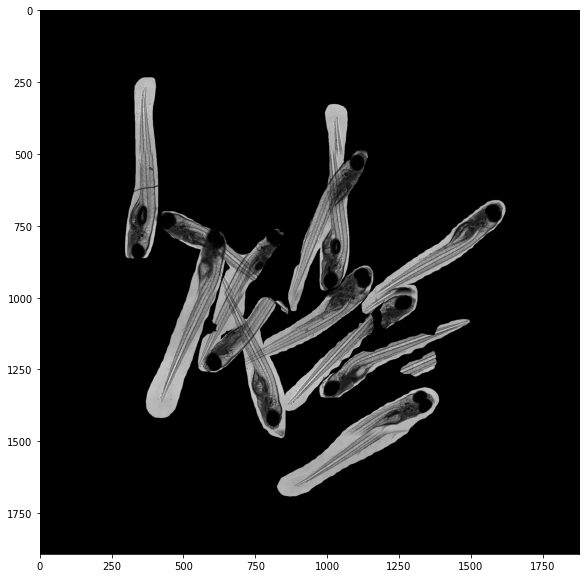

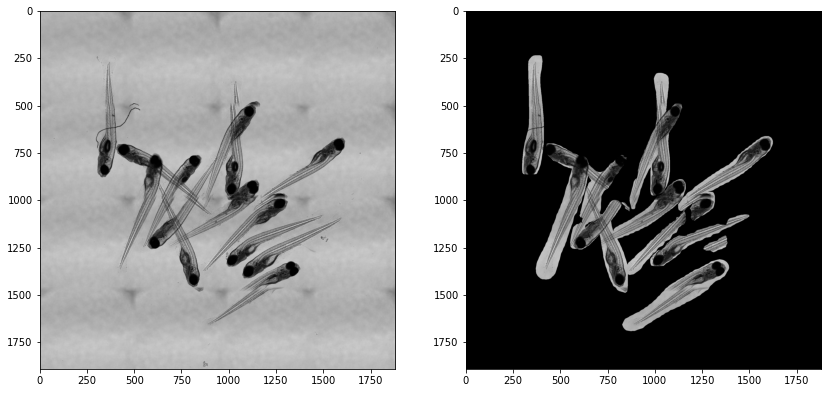

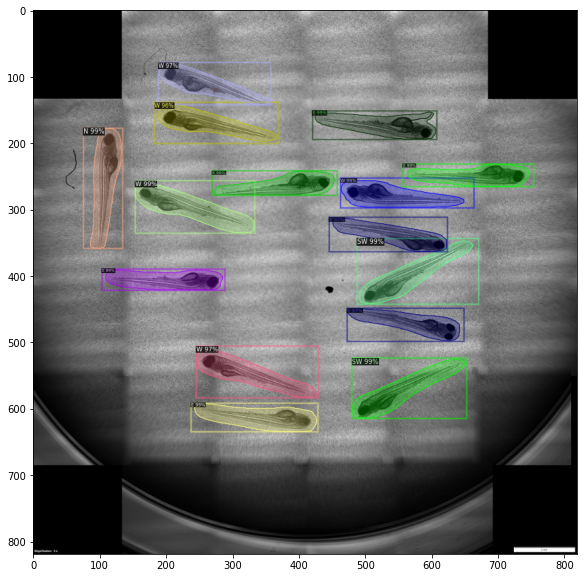

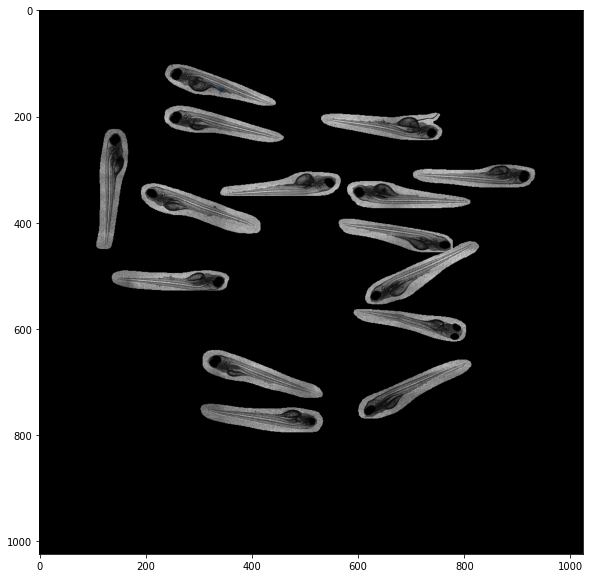

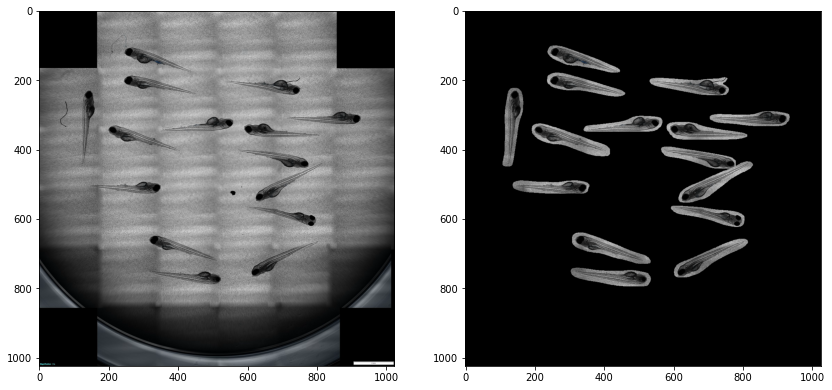

In [12]:
for image, prediction in zip(images, predictions):
    plot_prediction(image, prediction, cfg)
    plot_segementation(image, prediction)
    plot_segementation_vs_real(image, prediction)